In [ ]:
import pandas as pd
df = pd.read_csv('/content/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.duplicated(subset={"title"}).value_counts()

False    6256
True       79
dtype: int64

In [ ]:
df.duplicated(subset={"text"}).value_counts()

False    6060
True      275
dtype: int64

In [ ]:
# df =  df.drop_duplicates(subset={"title"},keep="first")
# df =  df.drop_duplicates(subset={"text"},keep="first")

In [ ]:
df['title-text'] = df['title'] + df['text']
df.drop('Unnamed: 0', axis =1 , inplace = True)
df

,title,text,label,title-text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"You Can Smell Hillary’s FearDaniel Greenfield,..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathyU.S...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


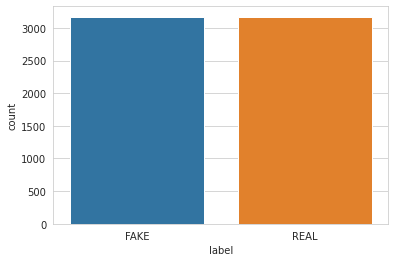

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(df['label'])

In [ ]:
# from wordcloud import WordCloud, STOPWORDS
# plt.figure(figsize = (20,20)) 

# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.axis('off')

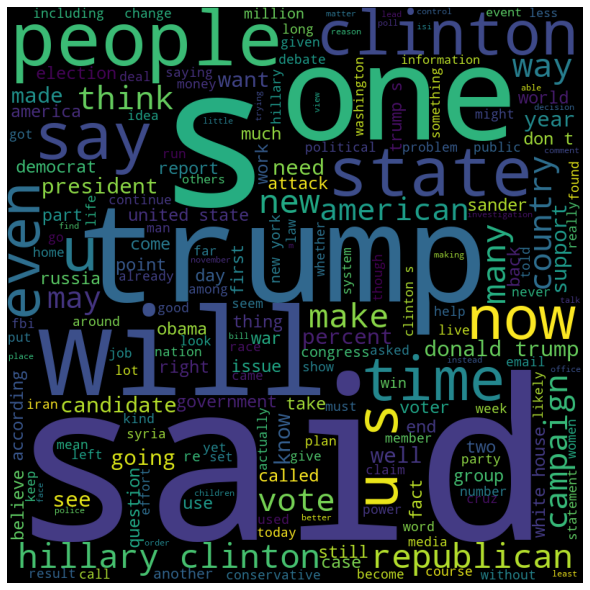

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.text:
  if((df['label'] == "REAL").bool):
      val = str(val)
      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

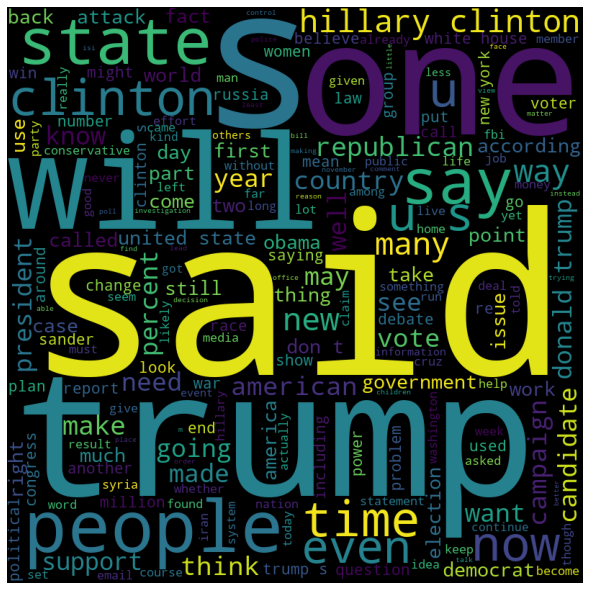

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.text:
  if((df['label'] == "FAKE").bool):
      val = str(val)
      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# import re
# import nltk
# nltk.download('stopwords')

In [ ]:
# import re
# # cleaning html symbols from the sentence
# def cleanhtml(sentence):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, ' ', sentence)
#     return cleantext

In [ ]:
# cleaning punctuations from the sentence
# def cleanpunc(sentence):
#     cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
#     cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
#     return  cleaned

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.stem.wordnet import WordNetLemmatizer

# stop = stopwords.words('english') #All the stopwords in English language
# #excluding some useful words from stop words list as we doing sentiment analysis
# excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
#              'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
#              'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
#              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# stop = [words for words in stop if words not in excluding]
# print(stop)

In [ ]:
# from nltk.stem import SnowballStemmer
# snow = SnowballStemmer('english') #initialising the snowball stemmer

In [ ]:
# print(snow.stem('Secretary')) #same meaning word with different spellings

In [ ]:
# i = 0
# string1 = ' '
# final_string = []
# fake_words = []                
# real_words = []
# s = ''

# for sent in df['title-text'].values:
#     filtered_sentence = []
#     sent = cleanhtml(sent)
#     sent = cleanpunc(sent)
#     for w in sent.split():
#         if((w.isalpha()) and (len(w)>2)):  
#             if(w.lower() not in stop):    # If it is a stopword
#                 s = (snow.stem(w.lower())).encode('utf8')
#                 filtered_sentence.append(s)
#                 if (df['label'].values)[i] == 'REAL':
#                     real_words.append(s)
#                 if(df['label'].values)[i] == 'FAKE':
#                     fake_words.append(s)
#             else:
#                 continue
#         else:
#             continue 
#     string1 = b" ".join(filtered_sentence) 
#     final_string.append(string1)
#     i += 1

In [ ]:
# df['CleanedText'] = final_string
# df.head()

In [ ]:

# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 1000):
#     review = re.sub('[^a-zA-Z]', ' ', df['title-text'].values[i])
#     review = review.lower()
#     review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review)

In [ ]:
y = df.iloc[:,2].values
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [ ]:
x = df.iloc[:,3].values
x

array(['You Can Smell Hillary’s FearDaniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leader

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [ ]:
# Applying the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english')
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k=2
model = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
model.fit(x_train_v,y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
y_pred = model.predict(x_test_v)
y_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype=object)

In [ ]:
accuracy_score(y_pred, y_test)*100

87.18434343434343

(-0.5, 1599.5, 799.5, -0.5)

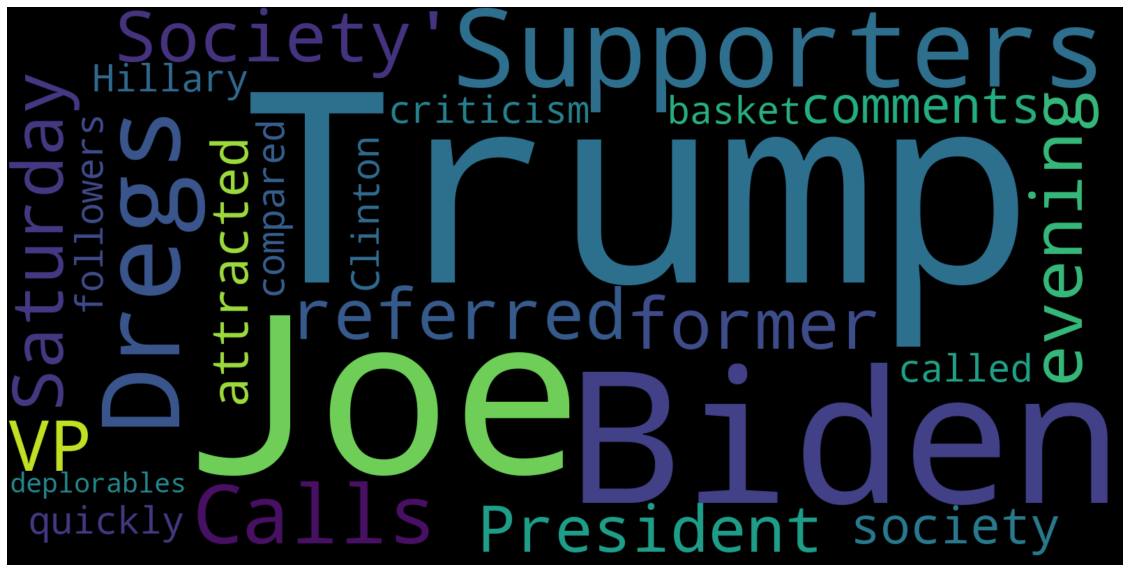

In [ ]:
m = 'Joe Biden Calls Trump Supporters \'Dregs of Society\' - Saturday evening, former VP Joe Biden referred to President Trump\'s supporters as the dregs of society. The comments have attracted criticism and were quickly compared to when Hillary Clinton called Trump\'s followers a \'basket of deplorables.\''

plt.figure(figsize = (20,20)) 

wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , 
               stopwords = STOPWORDS).generate(m)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
                      


In [ ]:
m = vect.transform([m])
model.predict(m)

array(['REAL'], dtype=object)

In [ ]:
n = vect.transform(['Donald Trump died'])
model.predict(n)

array(['FAKE'], dtype=object)

In [ ]:
import joblib
joblib.dump(model, 'Real-Fake')

['Real-Fake']